In [1]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [7]:
import os
trainFile = 'F:\\BaiduYunDownload\\金融的人工智能革命\\第4周\\作业数据\\LoanStats3a.csv'

pwd = os.getcwd()#get current work directory
print('1',pwd)
os.chdir(os.path.dirname(trainFile))#
print(os.path.dirname(trainFile))


data = pd.read_csv('LoanStats3a.csv',encoding='latin-1',skiprows = 1) #读取数据data.head() #查看表格默认前5行

1 F:\BaiduYunDownload\金融的人工智能革命\第4周\作业数据
F:\BaiduYunDownload\金融的人工智能革命\第4周\作业数据


In [8]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,5000.00000,5000.00000,4975.00000,36 months,10.65%,162.87000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,2500.00000,2500.00000,2500.00000,60 months,15.27%,59.83000,C,C4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,2400.00000,2400.00000,2400.00000,36 months,15.96%,84.33000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,13.49%,339.31000,C,C1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,3000.00000,3000.00000,3000.00000,60 months,12.69%,67.79000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
5,NaN,nan,5000.00000,5000.00000,5000.00000,36 months,7.90%,156.46000,A,A4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
6,NaN,nan,7000.00000,7000.00000,7000.00000,60 months,15.96%,170.08000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
7,NaN,nan,3000.00000,3000.00000,3000.00000,36 months,18.64%,109.43000,E,E1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
8,NaN,nan,5600.00000,5600.00000,5600.00000,60 months,21.28%,152.39000,F,F2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
9,NaN,nan,5375.00000,5375.00000,5350.00000,60 months,12.69%,121.45000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [9]:
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #查看缺失值比例
print(check_null[check_null > 0.2]) # 查看缺失比例大于20%的属性。


total_cu_tl                           1.00000
pct_tl_nvr_dlq                        1.00000
mths_since_recent_bc                  1.00000
mths_since_recent_bc_dlq              1.00000
mths_since_recent_inq                 1.00000
mths_since_recent_revol_delinq        1.00000
num_accts_ever_120_pd                 1.00000
num_actv_bc_tl                        1.00000
num_actv_rev_tl                       1.00000
num_bc_sats                           1.00000
num_bc_tl                             1.00000
num_il_tl                             1.00000
num_op_rev_tl                         1.00000
num_rev_accts                         1.00000
num_rev_tl_bal_gt_0                   1.00000
num_sats                              1.00000
num_tl_120dpd_2m                      1.00000
num_tl_30dpd                          1.00000
num_tl_90g_dpd_24m                    1.00000
mort_acc                              1.00000
mo_sin_rcnt_tl                        1.00000
mo_sin_rcnt_rev_tl_op             

In [12]:
thresh_count = len(data)*0.4 # 设定阀值
data = data.dropna(thresh=thresh_count, axis=1 )
data.shape

(42538, 54)

In [13]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

desc                         0.31254
emp_title                    0.06176
pub_rec_bankruptcies         0.03216
chargeoff_within_12_mths     0.00348
collections_12_mths_ex_med   0.00348
tax_liens                    0.00254
revol_util                   0.00219
last_pymnt_d                 0.00202
delinq_2yrs                  0.00075
earliest_cr_line             0.00075
inq_last_6mths               0.00075
open_acc                     0.00075
total_acc                    0.00075
pub_rec                      0.00075
delinq_amnt                  0.00075
acc_now_delinq               0.00075
title                        0.00035
last_credit_pull_d           0.00016
annual_inc                   0.00016
purpose                      0.00007
funded_amnt                  0.00007
funded_amnt_inv              0.00007
term                         0.00007
pymnt_plan                   0.00007
installment                  0.00007
grade                        0.00007
loan_status                  0.00007
i

In [15]:

data.to_csv('loans_2017q2_ml.csv', index = False) # 将初步预处理后的数据转化为csv

In [26]:
loans = pd.read_csv('loans_2017q2_ml.csv',encoding='gb2312')
loans.dtypes.value_counts() # 分类统计数据类型

float64    29
object     25
dtype: int64

In [27]:
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [28]:
objectColumns = loans.select_dtypes(include=["object"]).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)


desc                    13295
emp_title                2627
revol_util                 93
last_pymnt_d               86
earliest_cr_line           32
title                      15
last_credit_pull_d          7
debt_settlement_flag        3
home_ownership              3
int_rate                    3
grade                       3
sub_grade                   3
emp_length                  3
loan_status                 3
verification_status         3
issue_d                     3
purpose                     3
zip_code                    3
addr_state                  3
term                        3
dtype: int64

In [29]:
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')



In [30]:
loans.int_rate.head(10)


0   10.65000
1   15.27000
2   15.96000
3   13.49000
4   12.69000
5    7.90000
6   15.96000
7   18.64000
8   21.28000
9   12.69000
Name: int_rate, dtype: float64

In [31]:
objectColumns = loans.select_dtypes(include=["object"]).columns  # 对objectColumns重新赋值

In [21]:
print(objectColumns)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


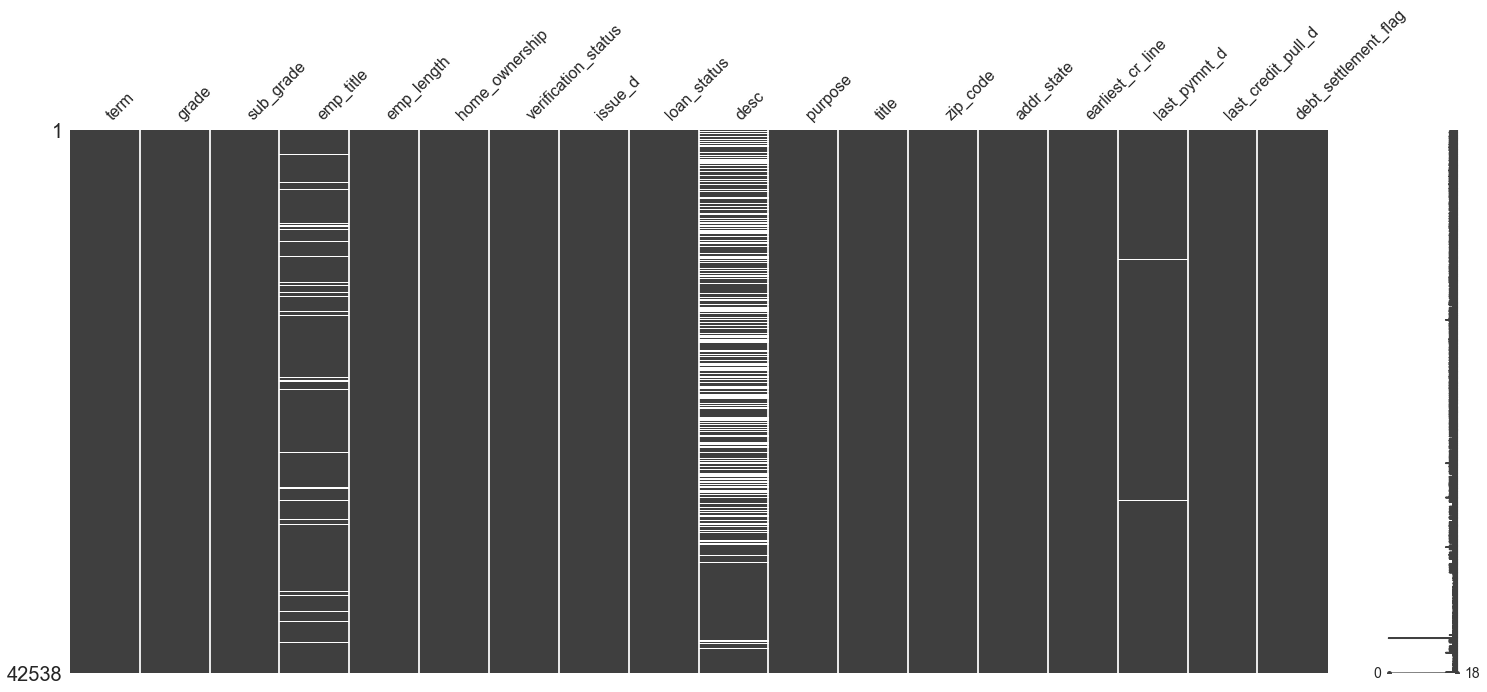

In [32]:
msno.matrix(loans[objectColumns]) #缺失值可视化

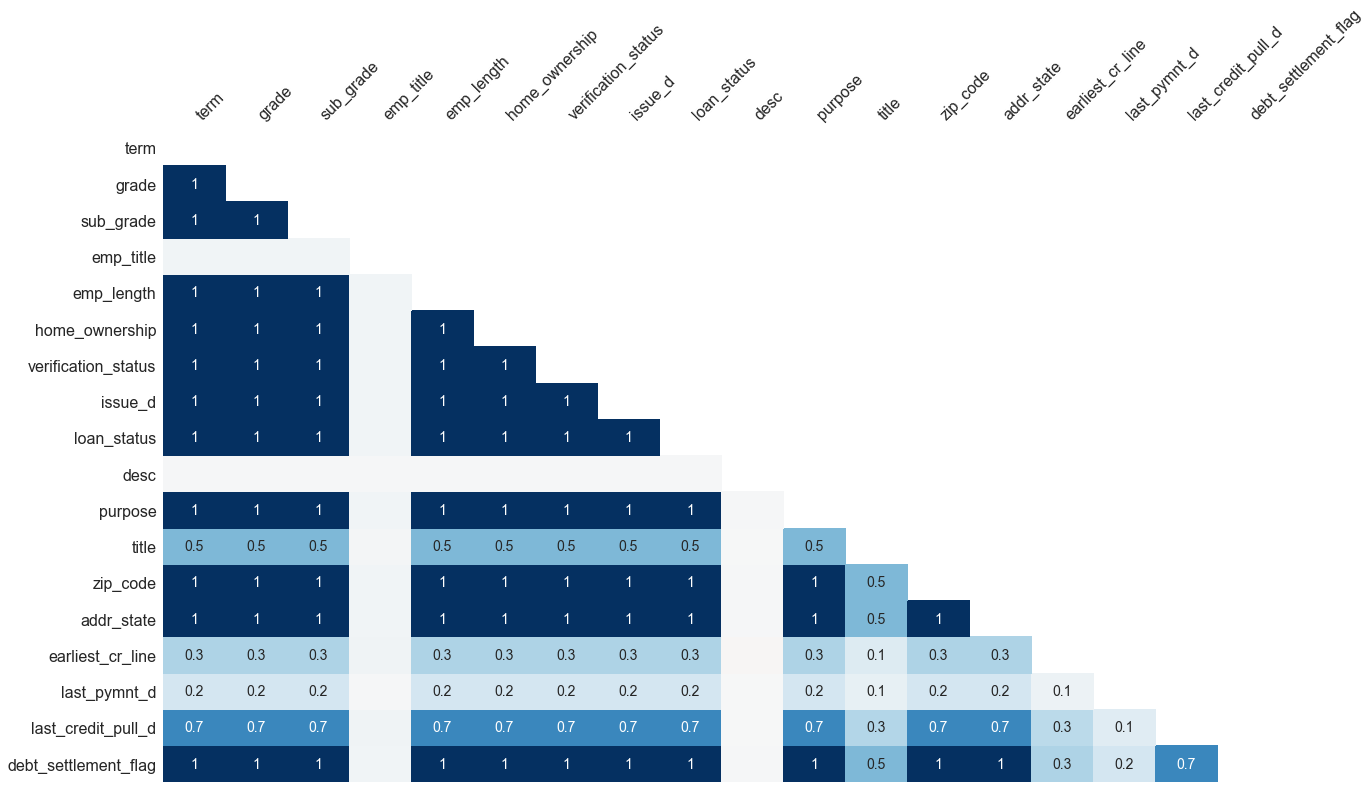

In [33]:
msno.heatmap(loans[objectColumns]) #查看缺失值之间的相关性

In [34]:
objectColumns = loans.select_dtypes(include=["object"]).columns # 筛选数据类型为object的数据
loans[objectColumns] = loans[objectColumns].fillna("Unknown") #以分类“Unknown”填充缺失值


In [ ]:
msno.bar(loans[objectColumns]) #可视化

In [ ]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

In [ ]:
numColumns = loans.select_dtypes(include=[np.number]).columns
msno.matrix(loans[numColumns])


In [ ]:
pd.set_option('display.max_columns', len(loans.columns))
loans[numColumns]


In [ ]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 针对axis=0 列来处理
imr = imr.fit(loans[numColumns])
loans[numColumns] = imr.transform(loans[numColumns])
msno.matrix(loans)

In [ ]:
objectColumns = loans.select_dtypes(include=["object"]).columns
var = loans[objectColumns].columns
for v in var:
    print('\nFrequency count for variable {0}'.format(v))
    print(loans[v].value_counts())
loans[objectColumns].shape


In [ ]:
drop_list = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
             'initial_list_status','title','issue_d','last_pymnt_d','last_pymnt_amnt',
             'last_credit_pull_d','policy_code','collection_recovery_fee', 'earliest_cr_line']
loans.drop(drop_list, axis=1,inplace=True)
loans

In [ ]:
loans.select_dtypes(include = ['object']).shape
loans.select_dtypes(include = ['object']).head()

In [ ]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(loans["loan_status"])

loans["loan_status"] = coding(loans["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1})

print( '\nAfter Coding:')

pd.value_counts(loans["loan_status"])


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()


In [ ]:
object_columns_df =loans.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df.iloc[0])

In [ ]:
loans['delinq_2yrs'] = loans['delinq_2yrs'].apply(lambda x: float(x))
loans['total_acc'] = loans['total_acc'].apply(lambda x: float(x))
loans['revol_bal'] = loans ['revol_bal'].apply(lambda x: float(x))
loans.select_dtypes(include=["object"]).describe().T # 再次检查数据


In [ ]:
# 构建mapping，对有序变量"emp_length”、“grade”进行转换
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict) #变量映射
loans[['emp_length','grade']].head() #查看效果


In [ ]:
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
dummy_df = pd.get_dummies(loans[n_columns])# 用get_dummies进行one hot编码
loans = pd.concat([loans, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并


In [ ]:
loans.loc[:,loans.columns.str.contains("home_ownership")].head() #筛选包含home_ownership的所有变量


In [ ]:
loans = loans.drop(n_columns, axis=1)  #清除原来的分类变量

In [ ]:
loans.info()

In [ ]:
col = loans.select_dtypes(include=['int64','float64']).columns
len(col) #78个特征
#col = col.drop('loan_status') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df###################################################################################
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化loans_ml_df.head() #查看经标准化后的数据

In [ ]:
loans_ml_df.head()


In [ ]:
#构建X特征变量和Y目标变量
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')
x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature) # 查看初始特征集合的数量

In [ ]:
x_val.describe().T # 初览数据

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 30) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中


In [ ]:
y_val